In [156]:
import urllib3
from bs4 import BeautifulSoup


rolist = ['employee_only', 'customer_and_employee']
nrlist = [1, 10000, 100000000]
rtlist = ['PII', 'PHI', 'PCI', 'PHI-PCI']
btlist = ['error', 'theft', 'hack']
paslist = [1, 50, 100]
rblist = ['true', 'false']
nclist = ['low', 'medium', 'high']
pplist = ['small', 'medium', 'large']
sqlist = ['below', 'average', 'above']
calist = ['true', 'false']

In [157]:
for ro in rolist:
    for nr in nrlist:
        for rt in rtlist:
            url = 'https://www.at-bay.com/bp/api/gui/v1/financial_exposure/calculate?record_owner='+ro+'&num_records='+str(nr)+'&record_type='+rt
            http = urllib3.PoolManager()
            response = http.request('GET', url)
            soup = BeautifulSoup(response.data, "lxml")
            f = open('test.csv', "a")
            soupstr = str(soup)
            pfixsoupstr = soupstr.replace('<html><body><p>{"result": {','').replace(' "call_center": ','').replace('"breach_coach": ','').replace(' "class_action_fines_and_defense": ','').replace(' "credit_monitoring": ','').replace(' "crisis_management": ','').replace(' "forensics": ','').replace(' "notification": ','').replace(' "pci_fines": ','').replace(' "regulatory_fines_and_defense": ','').replace('}, "total": ',',').replace(' "cost_per_record": ', '').replace('}','').replace('\n','').replace('</p></body></html>','')
            f.write(ro+','+str(nr)+','+rt+','+pfixsoupstr+"\n")
            f.close() 

/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is be

In [158]:
import pandas as pd

df = pd.read_csv('test.csv',names=['ro','nr','rt','bc', 'cc', 'cafd', 'crem', 'crim','for','not','pcif','reg','total','cpr'])

df

,ro,nr,rt,bc,cc,cafd,crem,crim,for,not,pcif,reg,total,cpr
0,employee_only,1,PII,25000,1300,0,10,30000,60000,2800,0,280000,399110,399110.0000
1,employee_only,1,PHI,25000,1300,0,10,40000,60000,2800,0,530000,659110,659110.0000
2,employee_only,1,PCI,25000,1300,0,10,20000,120000,2800,75000,280000,524110,524110.0000
3,employee_only,1,PHI-PCI,25000,1300,0,10,40000,120000,2800,75000,530000,794110,794110.0000
4,employee_only,10000,PII,50000,6100,650000,74000,53000,60000,15000,0,280000,1188100,118.8100
5,employee_only,10000,PHI,50000,6100,880000,89000,70000,60000,15000,0,530000,1700100,170.0100
6,employee_only,10000,PCI,50000,6100,650000,59000,35000,120000,15000,380000,280000,1595100,159.5100
7,employee_only,10000,PHI-PCI,50000,6100,880000,89000,70000,120000,15000,380000,530000,2140100,214.0100
8,employee_only,100000000,PII,750000,88000000,18000000,490000000,300000,750000,56000000,0,20000000,673800000,6.7380
9,employee_only,100000000,PHI,750000,88000000,18000000,490000000,400000,750000,56000000,0,41000000,694900000,6.9490


`get_dict_for_query` takes a dataframe, value in the `ro` (recordowner) column, value in the `rt` (recordtype) column, and a column for which to return a value
`sub_df` creates a dataframe which just contains rows matching recordowner and recordtypes
keys for the dictionary are set to `nr` (numberrecords) value, how matplotlib wants it
values are from other columns corresponding from rows in `sub_df` - depends on input of `column_name`


returns keys (nr values) and values (ro and rt values)

In [159]:
df

,ro,nr,rt,bc,cc,cafd,crem,crim,for,not,pcif,reg,total,cpr
0,employee_only,1,PII,25000,1300,0,10,30000,60000,2800,0,280000,399110,399110.0000
1,employee_only,1,PHI,25000,1300,0,10,40000,60000,2800,0,530000,659110,659110.0000
2,employee_only,1,PCI,25000,1300,0,10,20000,120000,2800,75000,280000,524110,524110.0000
3,employee_only,1,PHI-PCI,25000,1300,0,10,40000,120000,2800,75000,530000,794110,794110.0000
4,employee_only,10000,PII,50000,6100,650000,74000,53000,60000,15000,0,280000,1188100,118.8100
5,employee_only,10000,PHI,50000,6100,880000,89000,70000,60000,15000,0,530000,1700100,170.0100
6,employee_only,10000,PCI,50000,6100,650000,59000,35000,120000,15000,380000,280000,1595100,159.5100
7,employee_only,10000,PHI-PCI,50000,6100,880000,89000,70000,120000,15000,380000,530000,2140100,214.0100
8,employee_only,100000000,PII,750000,88000000,18000000,490000000,300000,750000,56000000,0,20000000,673800000,6.7380
9,employee_only,100000000,PHI,750000,88000000,18000000,490000000,400000,750000,56000000,0,41000000,694900000,6.9490


In [160]:
import numpy as np 
def get_arrays_by_owner_type_column(df, roval, rtval, column_name):
    sub_df = df.loc[(df["ro"] == roval) & (df["rt"] == rtval)]
    keys = sub_df['nr'].values
    values = sub_df[column_name].values
    results = np.vstack([keys,values]).transpose()
    return results

In [161]:
get_arrays_by_owner_type_column(df, 'employee_only', 'PII', 'not')

array([[        1,      2800],
       [    10000,     15000],
       [100000000,  56000000]])

`plot_by_column_name` will take `dataframe, recordowner, recordtype, and columnname` and return 8 plots. The top row of plots `axs[0,*]` are `employee_only`, the bottom row are `customer_and_employee`, and the columns are PII, PCI, PHI, PHI-PCI in that order. Different colors on the chart correspond to different variables, which are identified in the legend

In [162]:
df.columns

Index(['ro', 'nr', 'rt', 'bc', 'cc', 'cafd', 'crem', 'crim', 'for', 'not',
       'pcif', 'reg', 'total', 'cpr'],
      dtype='object')

/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


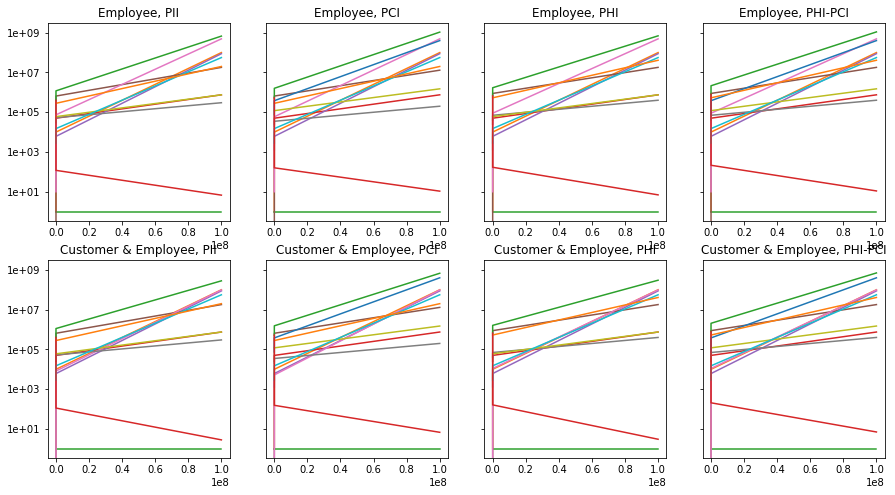

In [182]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

dfc = df.columns
rodict = {'employee_only': 0, 'customer_and_employee': 1}
rtdict = {'PII': 0, 'PCI': 1, 'PHI': 2, 'PHI-PCI': 3}

rolabel = {'employee_only': 'Employee', 'customer_and_employee': 'Customer & Employee'}

fig, axs = plt.subplots(2,4, figsize=(15, 8), sharey=True)

for o in rolist:
    for t in rtlist:
        ax = axs[rodict[o],rtdict[t]]
        ax.set_title(''+rolabel[o]+', '+t+'')
        for c in df.columns:
            data = get_arrays_by_owner_type_column(df, o, t, c)
            dk = data.transpose()[0]
            dv = data.transpose()[1]
            ax.plot(dk,dv)
            ax.set_yscale('log')
            # Rewrite the y labels
            y_labels = ax.get_yticks()
            ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0e'))
            

In [218]:
import altair as alt

for c in df.columns:
    owner_type_column_array = get_arrays_by_owner_type_column(df, 'customer_and_employee', 'PCI', c)
    altdf = pd.DataFrame(data = owner_type_column_array)
    altdf.columns = ['nr', 'val']
    alt.Chart(altdf).mark_line().encode(
        x = 'nr',
        y = 'val'
    )

In [222]:
def get_
owner_type_column_array = get_arrays_by_owner_type_column(df, 'customer_and_employee', 'PCI', c)
altdf = pd.DataFrame(data = owner_type_column_array)


In [224]:
data.iris().head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


In [232]:
df.columns

Index(['ro', 'nr', 'rt', 'bc', 'cc', 'cafd', 'crem', 'crim', 'for', 'not',
       'pcif', 'reg', 'total', 'cpr'],
      dtype='object')

In [259]:
ce_pci_df

,nr,bc,cc,cafd,crem,crim,for,not,pcif,reg,total,cpr
14,1,25000,1300,0,0,20000,120000,2800,75000,280000,524100,524100.0000
18,10000,50000,6100,650000,5200,35000,120000,15000,380000,280000,1541300,154.1300
22,100000000,750000,88000000,13000000,98000000,200000,1500000,56000000,400000000,20000000,677450000,6.7745


In [ ]:

def split_and_reshape(df, roval, rtval):
    ro_rt_df = df[(df['ro'] == 'customer_and_employee') & (df['rt'] == 'PCI')].drop(columns=['rt','ro'])
    roval+rtval_reshaped_df = pd.melt(ro_rt_df, id_vars=['nr'], var_name='val')

In [269]:
reshaped_df = pd.melt(df, id_vars=['nr','ro','rt'], var_name='column_name')

In [271]:
reshaped_df.head()

,nr,ro,rt,column_name,value
0,1,employee_only,PII,bc,25000.0
1,1,employee_only,PHI,bc,25000.0
2,1,employee_only,PCI,bc,25000.0
3,1,employee_only,PHI-PCI,bc,25000.0
4,10000,employee_only,PII,bc,50000.0


In [267]:
ce_pci_df = df[(df['ro'] == 'customer_and_employee') & (df['rt'] == 'PCI')].drop(columns=['rt','ro'])
ce_pci_reshaped_df = pd.melt(ce_pci_df, id_vars=['nr'], var_name='column_name')

In [261]:
ce_pci_reshaped_df

,nr,val,value
0,1,bc,2.500000e+04
1,10000,bc,5.000000e+04
2,100000000,bc,7.500000e+05
3,1,cc,1.300000e+03
4,10000,cc,6.100000e+03
5,100000000,cc,8.800000e+07
6,1,cafd,0.000000e+00
7,10000,cafd,6.500000e+05
8,100000000,cafd,1.300000e+07
9,1,crem,0.000000e+00


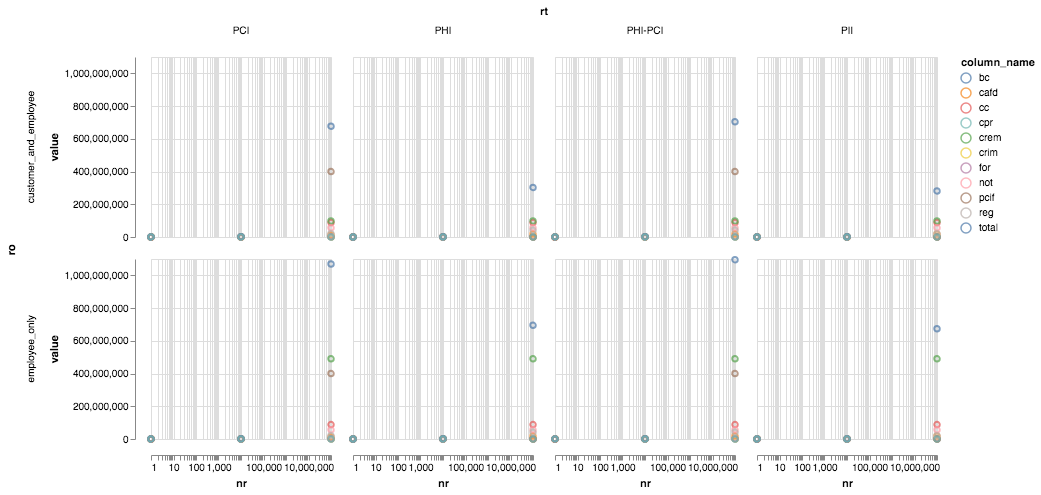

In [272]:
alt.Chart(reshaped_df).mark_point().encode(
    alt.X('nr:Q', scale=alt.Scale(type='log')),
    alt.Y('value:Q', scale=alt.Scale(zero=False)),
    color='column_name:N'
).properties(
    width=180,
    height=180
).facet(
    column='rt:N',
    row='ro:N'
)

In [248]:
source.head()

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45


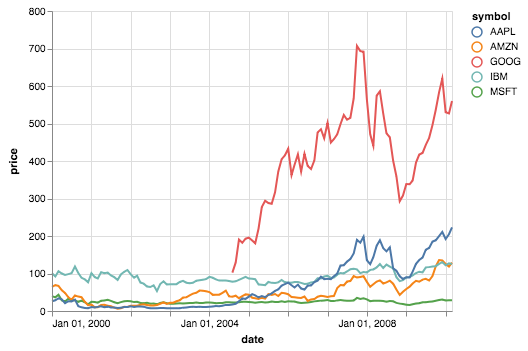

In [246]:
import altair as alt
from vega_datasets import data

source = data.stocks()

alt.Chart(source).mark_line().encode(
    x='date',
    y='price',
    color='symbol'
)